# Task 1.

## 1.Predict the percentage of an student based on the no. of study hours.
## 2.This is a simple Linear Regression task.
### Let's Start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.shape

(25, 2)

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

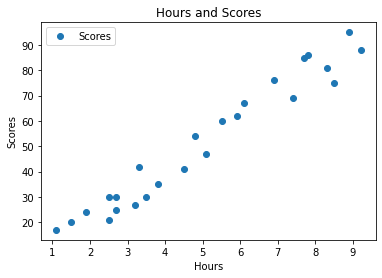

In [8]:
#plotting the distribution of scores
data.plot(x="Hours", y="Scores", style="o")
plt.title('Hours and Scores')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Here is a clear positive linear relation between num of hours studies and percentage of scores

# Train, Test and Splitting Data

### Next Step is divide data two diffrent part.
1. feature (input varible)
2. label (output varible)

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
#X = data.drop('Scores',axis=1)
#y = data.drop('Hours',axis=1)
print('X', X.shape)
print('y', y.shape)

X (25, 1)
y (25,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (20, 1)
y_train:  (20,)
X_test:  (5, 1)
y_test:  (5,)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f"Intercept is :", model.intercept_)

Intercept is : 2.018160041434683


In [14]:
print(f"Coefficient is :", model.coef_)

Coefficient is : [9.91065648]


In [15]:
#m = 9.91065648
#c = 2.018160041434683
#y = m * 9.25 + c
#y

In [16]:
#model.predict([[9.25]])[0][0]

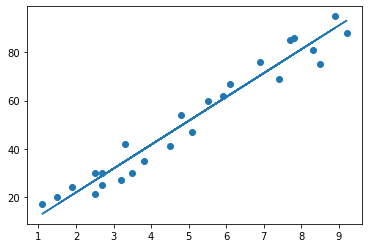

In [17]:
# Plotting the model regression line
line = model.coef_*X+model.intercept_

# Plotting the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

# Make Prediction Data

In [18]:
y_predict = model.predict(X_test)

In [19]:
# compared and actual and predicted data
df = pd.DataFrame({"Actual Data": y_test, "Predicted Data": y_predict})

In [20]:
df

,Actual Data,Predicted Data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Check Our Model Accuracy

In [21]:
model.score(X_test,y_test)

0.9454906892105356

#### Here a question is:
### What will be predicted score if a student studies for 9.25 hrs/ day? 

In [22]:
def no_of_hours(hours):
#hours = np.array([[9.25]])
    h_pred = model.predict(hours)
    print("No of Hours = {}".format(hours))
    print("Predicted Score = {}".format(h_pred[0]))

In [23]:
no_of_hours([[9.25]])

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating the model

In [24]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_predict))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
